# Heart Health

Dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/code

- Age : Age of the patient

- Sex : Sex of the patient

- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved

- exng: exercise induced angina (1 = yes; 0 = no)

- oldpeak: Previous peak

- caa: number of major vessels (0-3)

target : 0= less chance of heart attack 1= more chance of heart attack

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
data = pd.read_csv('heart.csv')

In [5]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# I have no information which tells me what 'slp' or 'thall' is, so I am going to remove them from the df for now
data.drop('slp', axis=1, inplace=True)
data.drop('thall', axis=1, inplace=True)

In [7]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,output
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,0,1
3,56,1,1,120,236,0,1,178,0,0.8,0,1
4,57,0,0,120,354,0,1,163,1,0.6,0,1


In [131]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'caa', 'output'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  caa       303 non-null    int64  
 11  output    303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
caa         0
output      0
dtype: int64

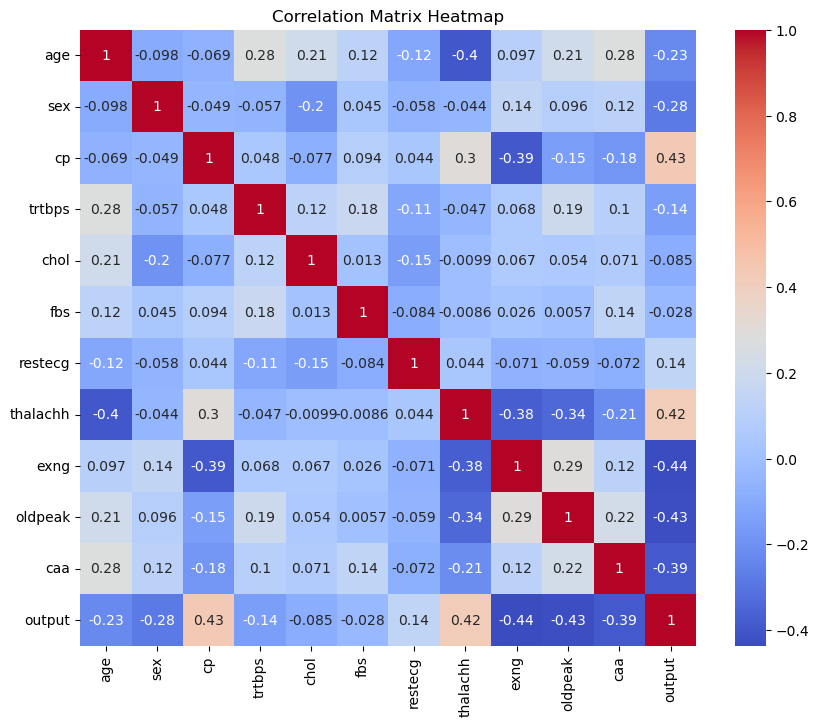

In [12]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Logistic Regresssion

In [23]:
#cp has a strong correlatin with liklihood of heart attack.

from sklearn.model_selection import train_test_split

X = data[['cp']]
y = data.output

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, train_size = 0.6, random_state = 100)

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [25]:
#y-intercept
beta0 = logreg.intercept_[0]
beta0

-0.42524723533402353

Probability that a data point is going to be assigned label 1

If a person has zero cp then....then the chance of being more likely to have a heart attach is less than 0 (-0.425 log odds)

In [27]:
import numpy as np
def log_odds_converter(log_odds):
    odds = np.exp(log_odds)
    return odds/(odds+1)

In [28]:
#logodds of the y-intercept

log_odds_converter(logreg.intercept_[0])

0.3952618171155522

This converts to a real %, which shows 39% likelihood of a heart attack

In [31]:
#Create our predict dataset using the test data
y_pred = logreg.predict(X_test)

In [32]:
#show a dataframe with the actul output against my predicted output
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

In [33]:
df

,Actual,Predicted
172,0,1
256,0,0
77,1,1
73,1,0
223,0,0
...,...,...
144,1,1
115,1,1
244,0,0
38,1,1


In [35]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [36]:
cnf_matrix

array([[46, 10],
       [10, 56]], dtype=int64)

In [37]:
# top left and bottom right = true positive and true negative 

# bottom left and top right = false positive and false negative

<function matplotlib.pyplot.show(close=None, block=None)>

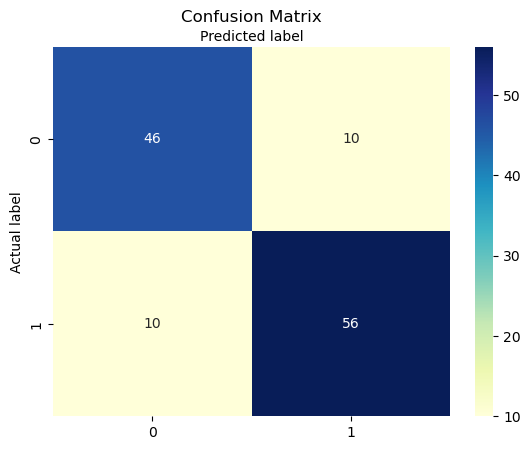

In [38]:
class_names = [0,1]

# the tick marks are the axis labels of 0 and 1 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g') # fmt = the text formatting 
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show

In [39]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        56
           1       0.85      0.85      0.85        66

    accuracy                           0.84       122
   macro avg       0.83      0.83      0.83       122
weighted avg       0.84      0.84      0.84       122



In [40]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))

Accuracy 0.8360655737704918
Precision 0.8484848484848485
Recall 0.8484848484848485


Bottom line is: 
- Accuracy value of 83%: of all the predictions we got 83% of them correct - but we don't know whether this is 1 or 0 
- Precision value of 84.8%: means that 84.8% of the labelled / predicted as hight risk of heart attack are correct 
- Recall value of 84.8% means that of all people, I labelled 84.8% correclty and others I didn't

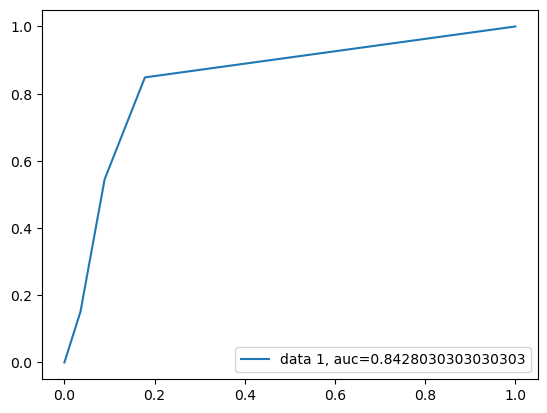

In [41]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1] # [::, 1] is just saying all values from column 1 of X_test

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba) # area under curve 

plt.plot(fpr, tpr, label='data 1, auc=' +str(auc))
plt.legend(loc=4)
plt.show()

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1-FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. As a basline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test. 

AUC (area under curve) score. AUC score 1 represents a perfect classifier, and 0.5 represents a worthelss classifier. 

## Tweaking model to make more accurate - adding more variables

In [153]:
#cp has a strong correlatin with liklihood of heart attack.

from sklearn.model_selection import train_test_split

X = data[['cp', 'age','thalachh']]
y = data.output

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, train_size = 0.6, random_state = 100)

In [154]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [155]:
#Create our predict dataset using the test data
y_pred = logreg.predict(X_test)

In [156]:
#show a dataframe with the actul output against my predicted output
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
172,0,1
256,0,0
77,1,1
73,1,1
223,0,0
...,...,...
144,1,0
115,1,1
244,0,0
38,1,1


In [157]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [158]:
cnf_matrix

array([[44, 12],
       [ 7, 59]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

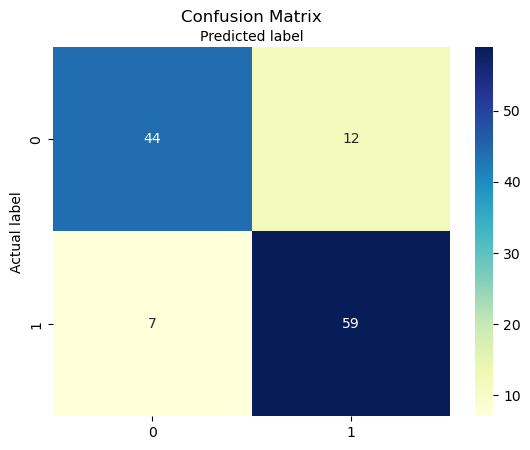

In [159]:
class_names = [0,1]

# the tick marks are the axis labels of 0 and 1 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g') # fmt = the text formatting 
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show

In [160]:
print(metrics.classification_report(y_test, y_pred))\

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        56
           1       0.83      0.89      0.86        66

    accuracy                           0.84       122
   macro avg       0.85      0.84      0.84       122
weighted avg       0.85      0.84      0.84       122



In [161]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))

Accuracy 0.8442622950819673
Precision 0.8309859154929577
Recall 0.8939393939393939


Bottom line is: 
- Accuracy value of 84.%: of all the predictions we got 84.4% of them correct - but we don't know whether this is 1 or 0 
- Precision value of 83%: means that 83% of the labelled / predicted as hight risk of heart attack are correct 
- Recall value of 89.4% means that of all high risk people, I labelled as high risk 89.4% correclty and others I didn't

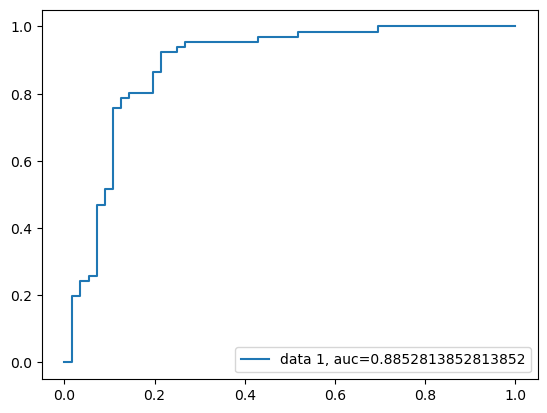

In [162]:
y_pred_proba = logreg.predict_proba(X_test)[::, 1] # [::, 1] is just saying all values from column 1 of X_test

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba) # area under curve 

plt.plot(fpr, tpr, label='data 1, auc=' +str(auc))
plt.legend(loc=4)
plt.show()

This prediction is much more accurate than the first.

However, we must consider the implications of the confusion matrix.

For example:
    1. False Negatives:
    
        - These people may miss required treatment from the hospital, causing potential injury or death.
        
    2. False Positives:
    
        - These people will be cuased unnneccesary worry. The hospital will also be using up resources on people who may not  need it,
        rather than on those who really do.